In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.subplots as sp

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Importa o arquivo como dataframe(df)
spacedf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Desafio2 - LEEGA/Space_Corrected.csv', sep=",")  

In [4]:
# Observando (df)
spacedf

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [5]:
spacedf.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
Company Name      object
Location          object
Datum             object
Detail            object
Status Rocket     object
 Rocket           object
Status Mission    object
dtype: object

In [6]:
spacedf.describe()

,Unnamed: 0.1,Unnamed: 0
count,4324.000000,4324.000000
mean,2161.500000,2161.500000
std,1248.375611,1248.375611
min,0.000000,0.000000
25%,1080.750000,1080.750000
50%,2161.500000,2161.500000
75%,3242.250000,3242.250000
max,4323.000000,4323.000000


# Drop e Rename de colunas

In [7]:
# Temos que as colunas 'Unnamed: 0.1' e 'Unnamed: 0' são iguais a index. Assim, será dropado as 2 colunas

spacedf.drop(['Unnamed: 0.1','Unnamed: 0'], axis=1,inplace = True)

In [8]:
# Ajeitando nomes das colunas para melhor compreensão

spacedf.rename(columns = {'Status Mission':'Status_mission'}, inplace = True)
spacedf.rename(columns = {'Status Rocket':'Status_rocket'}, inplace = True)
spacedf.rename(columns = {'Company Name':'Company_name'}, inplace = True)
spacedf.rename(columns = {' Rocket':'Rocket(M$)'}, inplace = True)
spacedf.rename(columns = {'Location':'Location_launch'}, inplace = True)

spacedf

,Company_name,Location_launch,Datum,Detail,Status_rocket,Rocket(M$),Status_mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


# Procurando dados nulos

In [9]:
spacedf.isnull().sum()

Company_name          0
Location_launch       0
Datum                 0
Detail                0
Status_rocket         0
Rocket(M$)         3360
Status_mission        0
dtype: int64

In [10]:
# Porcentagem de valores faltantes em relação ao total de valores da coluna Rocket

porcentagem = spacedf["Rocket(M$)"].isnull().sum() / len(spacedf["Rocket(M$)"])
porcentagem

# 77% de valores faltantes

0.7770582793709528

# Adaptando a coluna de Localização

In [11]:
# Extrai o pais da coluna original
def extracao(localizacao):
    partes = localizacao.split(", ")
    return partes[-1]

# Exclui o pais da coluna original
def excluir(localizacao):
    partes = localizacao.split(',')
    return ','.join(partes[:-1])


# Aplica as funções
spacedf['Country_launch'] = spacedf['Location_launch'].apply(extracao)
spacedf['Location_launch'] = spacedf['Location_launch'].apply(excluir)

spacedf

,Company_name,Location_launch,Datum,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch
0,SpaceX,"LC-39A, Kennedy Space Center, Florida","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


In [12]:
# Procura por "?" ou "œ" nos textos da coluna 'Location_launch'
mask = spacedf['Location_launch'].str.contains('[?\œ\\›]')

# Filtra o DataFrame com base na máscara
spacedf_filtered = spacedf[mask]
filtered_index = spacedf_filtered.index
spacedf_filtered

,Company_name,Location_launch,Datum,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch
15,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,New Zealand
21,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Sat Jun 13, 2020 05:12 UTC",Electron/Curie | Don't stop me now!,StatusActive,7.5,Success,New Zealand
55,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Fri Jan 31, 2020 02:56 UTC",Electron/Curie | Birds of a Feather / NROL-151,StatusActive,7.5,Success,New Zealand
77,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Fri Dec 06, 2019 08:18 UTC",Electron/Curie | Running Out Of Fingers,StatusActive,7.5,Success,New Zealand
93,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Thu Oct 17, 2019 01:22 UTC",Electron/Curie | As The Crow Flies,StatusActive,7.5,Success,New Zealand
109,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Mon Aug 19, 2019 12:12 UTC","Electron/Curie | Look Ma, No Hands!",StatusActive,7.5,Success,New Zealand
128,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Sat Jun 29, 2019 04:30 UTC",Electron/Curie | Make it Rain,StatusActive,7.5,Success,New Zealand
140,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Sun May 05, 2019 06:00 UTC",Electron/Curie | That's a Funny Looking Cactus,StatusActive,7.5,Success,New Zealand
151,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Thu Mar 28, 2019 23:27 UTC",Electron/Curie | Two Thumbs Up,StatusActive,7.5,Success,New Zealand
180,Rocket Lab,"Rocket Lab LC-1A, M?hia Peninsula","Sun Dec 16, 2018 06:33 UTC",Electron/Curie | This one's for Pickering,StatusActive,7.5,Success,New Zealand


In [13]:
# Ajeitando os problemas de enconding
spacedf['Location_launch'] =spacedf['Location_launch'].str.replace('?', 'a').str.replace('œ','').str.replace('','').str.replace('›','')

# Revendo as linhas que estavam com problemas 
spacedf.loc[filtered_index]

<ipython-input-13-18298b84c30e>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  spacedf['Location_launch'] =spacedf['Location_launch'].str.replace('?', 'a').str.replace('œ','').str.replace('','').str.replace('›','')


,Company_name,Location_launch,Datum,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch
15,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Sat Jul 04, 2020 21:19 UTC",Electron/Curie | Pics Or It Didn??¦t Happen,StatusActive,7.5,Failure,New Zealand
21,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Sat Jun 13, 2020 05:12 UTC",Electron/Curie | Don't stop me now!,StatusActive,7.5,Success,New Zealand
55,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Fri Jan 31, 2020 02:56 UTC",Electron/Curie | Birds of a Feather / NROL-151,StatusActive,7.5,Success,New Zealand
77,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Fri Dec 06, 2019 08:18 UTC",Electron/Curie | Running Out Of Fingers,StatusActive,7.5,Success,New Zealand
93,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Thu Oct 17, 2019 01:22 UTC",Electron/Curie | As The Crow Flies,StatusActive,7.5,Success,New Zealand
109,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Mon Aug 19, 2019 12:12 UTC","Electron/Curie | Look Ma, No Hands!",StatusActive,7.5,Success,New Zealand
128,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Sat Jun 29, 2019 04:30 UTC",Electron/Curie | Make it Rain,StatusActive,7.5,Success,New Zealand
140,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Sun May 05, 2019 06:00 UTC",Electron/Curie | That's a Funny Looking Cactus,StatusActive,7.5,Success,New Zealand
151,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Thu Mar 28, 2019 23:27 UTC",Electron/Curie | Two Thumbs Up,StatusActive,7.5,Success,New Zealand
180,Rocket Lab,"Rocket Lab LC-1A, Mahia Peninsula","Sun Dec 16, 2018 06:33 UTC",Electron/Curie | This one's for Pickering,StatusActive,7.5,Success,New Zealand


# Adaptando a coluna Company name

In [14]:
# Procura por "?" ou "œ" nos textos da coluna 'Company_name'
mask = spacedf['Company_name'].str.contains('[?\œ\\›]')

# Filtra o DataFrame com base na máscara
spacedf_filtered = spacedf[mask]
filtered_index = spacedf_filtered.index
spacedf_filtered

,Company_name,Location_launch,Datum,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch
3800,Arm??e de l'Air,"Brigitte, Hammaguir, Algeria","Wed Feb 15, 1967 10:06 UTC",Diamant A | Diad?ªme 2,StatusRetired,NaN,Success,France
3803,Arm??e de l'Air,"Brigitte, Hammaguir, Algeria","Wed Feb 08, 1967 08:39 UTC",Diamant A | Diad?ªme 1,StatusRetired,NaN,Partial Failure,France
3903,Arm??e de l'Air,"Brigitte, Hammaguir, Algeria","Thu Feb 17, 1966 07:33 UTC",Diamant A | Diapason,StatusRetired,NaN,Success,France
3923,Arm??e de l'Air,"Brigitte, Hammaguir, Algeria","Fri Nov 26, 1965 14:47 UTC",Diamant A | Ast??rix,StatusRetired,NaN,Success,France


In [15]:
# Ajeitando os problemas de enconding
spacedf['Company_name'] =spacedf['Company_name'].str.replace('?', '')

# Revendo as linhas que estavam com problemas 
spacedf.loc[filtered_index]

<ipython-input-15-edfb321eb876>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  spacedf['Company_name'] =spacedf['Company_name'].str.replace('?', '')


,Company_name,Location_launch,Datum,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch
3800,Arme de l'Air,"Brigitte, Hammaguir, Algeria","Wed Feb 15, 1967 10:06 UTC",Diamant A | Diad?ªme 2,StatusRetired,NaN,Success,France
3803,Arme de l'Air,"Brigitte, Hammaguir, Algeria","Wed Feb 08, 1967 08:39 UTC",Diamant A | Diad?ªme 1,StatusRetired,NaN,Partial Failure,France
3903,Arme de l'Air,"Brigitte, Hammaguir, Algeria","Thu Feb 17, 1966 07:33 UTC",Diamant A | Diapason,StatusRetired,NaN,Success,France
3923,Arme de l'Air,"Brigitte, Hammaguir, Algeria","Fri Nov 26, 1965 14:47 UTC",Diamant A | Ast??rix,StatusRetired,NaN,Success,France


# Adaptando a coluna Rocket

In [16]:
# Ajeitando a coluna Rocket(M$)
spacedf['Rocket(M$)'] = spacedf['Rocket(M$)'].str.replace(',', '').str.strip()
spacedf['Rocket(M$)'] = pd.to_numeric(spacedf['Rocket(M$)'])

spacedf

,Company_name,Location_launch,Datum,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch
0,SpaceX,"LC-39A, Kennedy Space Center, Florida","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


In [17]:
spacedf['Rocket(M$)'].sort_values(ascending = False).head(8)

1916    5000.0
2000    5000.0
3545    1160.0
3603    1160.0
3475    1160.0
3511    1160.0
3243    1160.0
3560    1160.0
Name: Rocket(M$), dtype: float64

# Adaptando datas e horários

In [18]:
spacedf.loc[4303] # Primeiro formato identificado do 'Datum'
#spacedf.loc[1] # Segundo formado identificado do 'Datum'

Company_name                                                 US Navy
Location_launch    Douglas F4D Skyray, Naval Air Station Point Mu...
Datum                                               Tue Aug 26, 1958
Detail                             NOTS-EV-1 Pilot II | Pilot-5 (R2)
Status_rocket                                          StatusRetired
Rocket(M$)                                                       NaN
Status_mission                                               Failure
Country_launch                                                   USA
Name: 4303, dtype: object

In [19]:
# Os UTCs estavam causando problemas ao serem processados junto com os outros dados de data,logo fiz um processo separado para ele

# Extrai UTCs
def extracao(value):
    partes = value.split(" ")
    if partes[-1] == 'UTC':
      return partes[-1]
    else:
      return 'Unknown'

# Exclui os UTCs da coluna original
def excluir(value):
    partes = value.split(' ')
    if partes[-1] == 'UTC':
      return ' '.join(partes[:-1])
    else:
      return ' '.join(partes[:])

# Aplica os filtros
spacedf['Time_zone'] = spacedf['Datum'].apply(extracao)
spacedf['Datum'] = spacedf['Datum'].apply(excluir)
spacedf

,Company_name,Location_launch,Datum,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch,Time_zone
0,SpaceX,"LC-39A, Kennedy Space Center, Florida","Fri Aug 07, 2020 05:12",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,UTC
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,UTC
2,SpaceX,"Pad A, Boca Chica, Texas","Tue Aug 04, 2020 23:57",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,UTC
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome","Thu Jul 30, 2020 21:25",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,UTC
4,ULA,"SLC-41, Cape Canaveral AFS, Florida","Thu Jul 30, 2020 11:50",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,UTC
...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida","Wed Feb 05, 1958 07:33",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,UTC
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida","Sat Feb 01, 1958 03:48",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,UTC
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida","Fri Dec 06, 1957 16:44",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,UTC
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome","Sun Nov 03, 1957 02:30",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,UTC


In [20]:
# Extrai e transforma os dados de data para novas colunas
def formata_data(value):
    try:
        datetime.strptime(value, '%a %b %d, %Y')
        return  pd.to_datetime(value, format='%a %b %d, %Y')
    except ValueError:
        return  pd.to_datetime(value, format='%a %b %d, %Y %H:%M')

# Aplica função
spacedf['data'] = spacedf['Datum'].apply(formata_data)

# Gera novas colunas com as informações 
spacedf['Week_day_launch'] = spacedf['data'].dt.day_name()
spacedf['Year_launch'] = spacedf['data'].dt.year
spacedf['Month_launch'] = spacedf['data'].dt.month
spacedf['Day_launch'] = spacedf['data'].dt.day
spacedf['Hour_launch'] = spacedf['data'].dt.hour
spacedf['Minute_launch'] = spacedf['data'].dt.minute

# Dropando as colunas que não estão mais sendo usadas
spacedf.drop(['data','Datum'], axis=1,inplace = True)

spacedf

,Company_name,Location_launch,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch,Time_zone,Week_day_launch,Year_launch,Month_launch,Day_launch,Hour_launch,Minute_launch
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,UTC,Friday,2020,8,7,5,12
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,UTC,Thursday,2020,8,6,4,1
2,SpaceX,"Pad A, Boca Chica, Texas",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,UTC,Tuesday,2020,8,4,23,57
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,UTC,Thursday,2020,7,30,21,25
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,UTC,Thursday,2020,7,30,11,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA,UTC,Wednesday,1958,2,5,7,33
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida",Juno I | Explorer 1,StatusRetired,NaN,Success,USA,UTC,Saturday,1958,2,1,3,48
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,UTC,Friday,1957,12,6,16,44
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,UTC,Sunday,1957,11,3,2,30


## Tratando Horas e Minutos

In [21]:
# Como alguns valores não existentes de horas e minutos foram colocados como 0, assumindo que nunca ocorra lançamentos exatos em 00h00, o valor nas duas colunas será NaN

spacedf.loc[(spacedf['Hour_launch'] == 0) & (spacedf['Minute_launch'] == 0), ['Hour_launch', 'Minute_launch']] = pd.NA

In [22]:
# O seguinte codigo aplica a média da coluna de minutos e horas aos valores NaNs das respectivas colunas

# # Calcula a média das colunas (excluindo os NaNs)
# mean_value1 = spacedf['Hour_launch'].mean(skipna=True)
# mean_value2 = spacedf['Minute_launch'].mean(skipna=True)
# print('media horas:', mean_value1)
# print('media minutos:', mean_value2)

# # Substitui todos NaNs pela média da coluna
# spacedf['Hour_launch'].fillna(mean_value1, inplace=True)
# spacedf['Minute_launch'].fillna(mean_value2, inplace=True)

# # Arredonda os valores para serem colocados como inteiros
# decimal_places = 0  # Define o número de casas decimais
# spacedf['Hour_launch'] = spacedf['Hour_launch'].round(decimal_places)
# spacedf['Minute_launch'] = spacedf['Minute_launch'].round(decimal_places)

# # Converter as colunas para o tipo int
# spacedf['Hour_launch'] = spacedf['Hour_launch'].astype('Int64')
# spacedf['Minute_launch'] = spacedf['Minute_launch'].astype('Int64')

# spacedf[['Minute_launch','Hour_launch']]

In [23]:
spacedf[['Minute_launch', 'Hour_launch']].isna().sum()

Minute_launch    135
Hour_launch      135
dtype: int64

# Procurando outliers



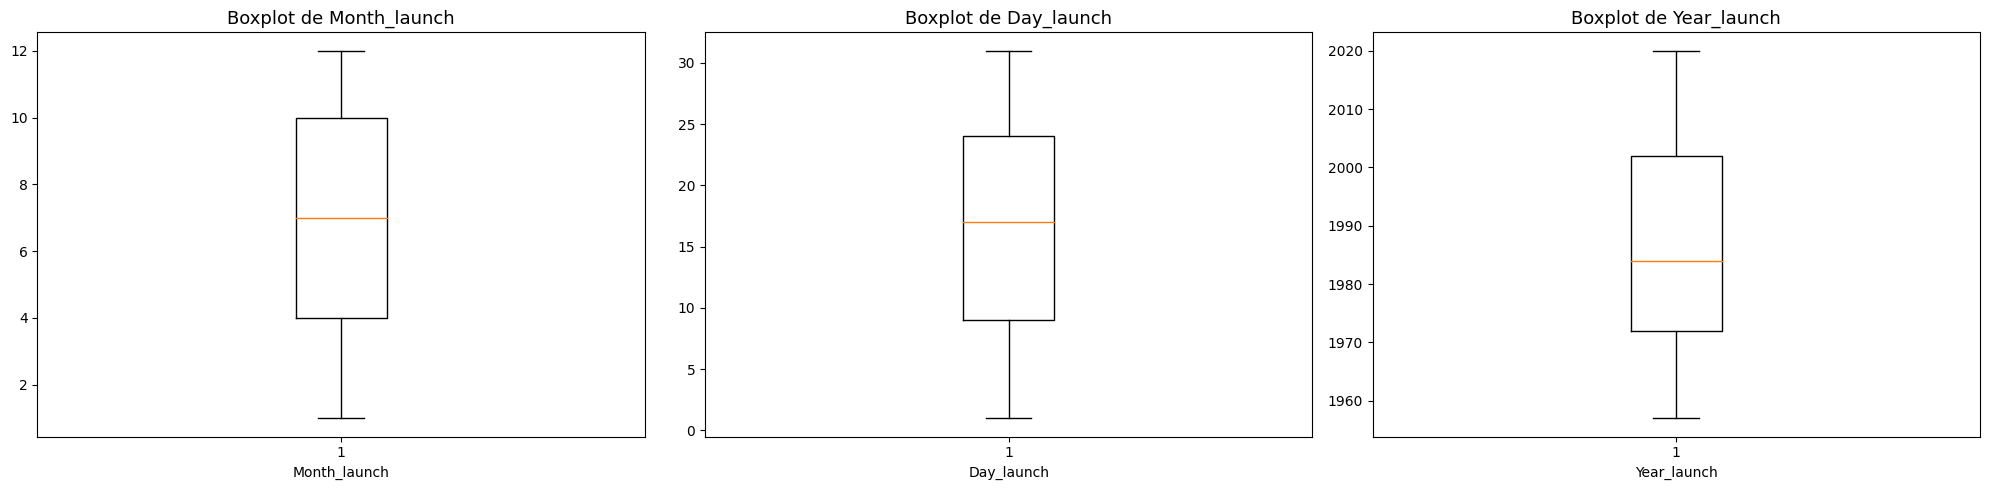

In [24]:
# Prepara para criar boxplots das seguintes colunas númericas,exceto da coluna 'Rocket','Hour_launch' e 'Minute_launch'
cols = ['Year_launch', 'Month_launch', 'Day_launch']
fig, axs = plt.subplots(1, len(cols), figsize=(20, 5))

# Cria um boxplot de cada coluna
for i, col in enumerate(cols):
    axs[i-1].boxplot(spacedf[col])
    axs[i-1].set_title(f'Boxplot de {col}', fontsize=13)
    axs[i-1].set_xlabel(col, fontsize=10)

fig.tight_layout()
plt.show()

## Outliers na coluna Rocket

<Axes: >

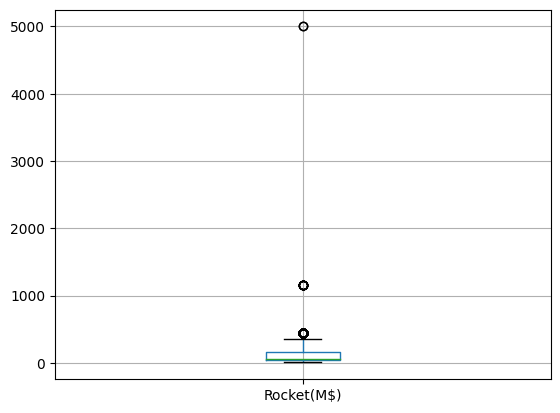

In [25]:
# Cria um boxplot da coluna Rocket
spacedf.boxplot(column=['Rocket(M$)'])

# É visto alguns outliers que talvez devam ser tratados

In [26]:
# Observando o outliers
spacedf[spacedf['Rocket(M$)'] > 1159]

,Company_name,Location_launch,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch,Time_zone,Week_day_launch,Year_launch,Month_launch,Day_launch,Hour_launch,Minute_launch
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome",Energiya/Buran | Buran,StatusRetired,5000.0,Success,Kazakhstan,UTC,Tuesday,1988,11,15,3.0,0.0
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome",Energiya/Polyus | Polyus Space Station,StatusRetired,5000.0,Success,Kazakhstan,UTC,Friday,1987,5,15,17.0,30.0
3149,NASA,"LC-39A, Kennedy Space Center, Florida",Saturn V | Skylab 1,StatusRetired,1160.0,Success,USA,UTC,Monday,1973,5,14,17.0,30.0
3180,NASA,"LC-39A, Kennedy Space Center, Florida",Saturn V | Apollo 17,StatusRetired,1160.0,Success,USA,UTC,Tuesday,1972,12,19,19.0,24.0
3243,NASA,"LC-39A, Kennedy Space Center, Florida",Saturn V | Apollo 16,StatusRetired,1160.0,Success,USA,UTC,Sunday,1972,4,16,17.0,54.0
3328,NASA,"LC-39A, Kennedy Space Center, Florida",Saturn V | Apollo 15,StatusRetired,1160.0,Success,USA,UTC,Monday,1971,7,26,13.0,34.0
3384,NASA,"LC-39A, Kennedy Space Center, Florida",Saturn V | Apollo 14,StatusRetired,1160.0,Success,USA,UTC,Sunday,1971,1,31,21.0,3.0
3475,NASA,"LC-39A, Kennedy Space Center, Florida",Saturn V | Apollo 13,StatusRetired,1160.0,Success,USA,UTC,Saturday,1970,4,11,19.0,13.0
3511,NASA,"LC-39A, Kennedy Space Center, Florida",Saturn V | Apollo 12,StatusRetired,1160.0,Success,USA,UTC,Friday,1969,11,14,16.0,22.0
3545,NASA,"LC-39A, Kennedy Space Center, Florida",Saturn V | Apollo 11,StatusRetired,1160.0,Success,USA,UTC,Wednesday,1969,7,16,13.0,32.0


In [27]:
# Dropando o outlier
spacedf = spacedf.drop(spacedf[spacedf['Rocket(M$)'] > 1160].index)

# Tratando valores faltantes na coluna Rocket

In [28]:
# Cria um copia do spacedf sem colocar NaNs como zero na coluna roc
spacedfNAN = spacedf.copy()

# Preenche com 0 os valores faltantes
spacedf['Rocket(M$)'] = spacedf['Rocket(M$)'].fillna(0)
spacedf

,Company_name,Location_launch,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch,Time_zone,Week_day_launch,Year_launch,Month_launch,Day_launch,Hour_launch,Minute_launch
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,UTC,Friday,2020,8,7,5.0,12.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,UTC,Thursday,2020,8,6,4.0,1.0
2,SpaceX,"Pad A, Boca Chica, Texas",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,UTC,Tuesday,2020,8,4,23.0,57.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,UTC,Thursday,2020,7,30,21.0,25.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,UTC,Thursday,2020,7,30,11.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,UTC,Wednesday,1958,2,5,7.0,33.0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida",Juno I | Explorer 1,StatusRetired,0.00,Success,USA,UTC,Saturday,1958,2,1,3.0,48.0
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,UTC,Friday,1957,12,6,16.0,44.0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,UTC,Sunday,1957,11,3,2.0,30.0


# Qual é o total de missões registradas?

In [29]:
spacedf.describe()

# O número de missões registradas é 4324

,Rocket(M$),Year_launch,Month_launch,Day_launch,Hour_launch,Minute_launch
count,4322.000000,4322.000000,4322.000000,4322.000000,4187.000000,4187.000000
mean,31.988820,1987.386627,6.753586,16.439611,11.708383,27.056604
std,105.948089,18.076741,3.417103,8.638631,6.701130,18.108710
min,0.000000,1957.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1972.000000,4.000000,9.000000,7.000000,11.000000
50%,0.000000,1984.000000,7.000000,17.000000,12.000000,29.000000
75%,0.000000,2002.000000,10.000000,24.000000,17.000000,42.000000
max,1160.000000,2020.000000,12.000000,31.000000,23.000000,59.000000


# Qual é o total de missões bem sucedidas?

In [30]:
spacedf["Status_mission"].value_counts()

# O número de missões que obtiveram sucesso é de 3877

Success              3877
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Status_mission, dtype: int64

In [31]:
# Contagem dos valores únicos e cálculo da porcentagem de cada
status_counts = spacedf['Status_mission'].value_counts()
total_count = len(spacedf)
status_percentages = (status_counts / total_count) * 100

# Criação do DataFrame para o Plotly Express
df = pd.DataFrame({'Status_mission': status_counts.index, 'Contagem': status_counts.values, 'Porcentagem': status_percentages.values})

# Cria o gráfico de colunas usando Plotly Express
fig = px.bar(df, x='Status_mission', 
             y='Contagem', 
             color='Status_mission')

# Adiciona a porcentagem em cada barra
for i, row in df.iterrows():
    percentage = row['Porcentagem']
    fig.add_annotation(x=row['Status_mission'], 
                       y=row['Contagem'], 
                       text=f'{percentage:.1f}%', 
                       showarrow=True, 
                       font=dict(size=15))

# Configurações do gráfico
fig.update_layout(
    xaxis_title='Status mission',
    yaxis_title='Contagem',
    title='Contagem de missões por status',
    showlegend=False,
)

fig.show()

# Qual o custo das missões por ano?

In [32]:
# Agrupa o df pelo ano de lançamento e calcula a soma da coluna 'Rocket'
spacedfNAN_agrupado = spacedfNAN.groupby('Year_launch')['Rocket(M$)'].sum()

# Cria um novo df com a soma da coluna de custo e os anos
spacedfNAN_soma_custo = pd.DataFrame({'Gastos totais no ano (Milhões $)': spacedfNAN_agrupado.values, 'Ano': spacedfNAN_agrupado.index})

# Ordena o df pelo ano em ordem crescente
spacedfNAN_soma_custo = spacedfNAN_soma_custo.sort_values(by='Ano')

# Cria o gráfico de linha
fig = px.line(spacedfNAN_soma_custo, x='Ano', 
              y='Gastos totais no ano (Milhões $)', 
              title='Gastos das missões por Ano')

# Configurações do estilo dos eixos
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='black')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='black')

fig.show()

In [33]:
# Agrupa o df pelo ano de lançamento e calcula a soma da coluna 'Rocket'
spacedf_agrupado = spacedf.groupby('Year_launch')['Rocket(M$)'].sum()

# Cria um novo df com a soma da coluna 'Rocket' e os anos
spacedf_soma_custo = pd.DataFrame({'Soma_Custo(M$)': spacedf_agrupado.values, 'Ano': spacedf_agrupado.index})

spacedf_soma_custo.sort_values(by='Soma_Custo(M$)', ascending=False).head(30)

,Soma_Custo(M$),Ano
61,5697.98,2018
52,5588.90,2009
59,5085.27,2016
12,4876.00,1969
60,4586.41,2017
62,4351.51,2019
53,4303.60,2010
54,4251.30,2011
57,4204.60,2014
28,4080.80,1985


# Gráficos Extras

In [34]:
spacedf

,Company_name,Location_launch,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch,Time_zone,Week_day_launch,Year_launch,Month_launch,Day_launch,Hour_launch,Minute_launch
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,UTC,Friday,2020,8,7,5.0,12.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,UTC,Thursday,2020,8,6,4.0,1.0
2,SpaceX,"Pad A, Boca Chica, Texas",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,UTC,Tuesday,2020,8,4,23.0,57.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,UTC,Thursday,2020,7,30,21.0,25.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,UTC,Thursday,2020,7,30,11.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,UTC,Wednesday,1958,2,5,7.0,33.0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida",Juno I | Explorer 1,StatusRetired,0.00,Success,USA,UTC,Saturday,1958,2,1,3.0,48.0
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,UTC,Friday,1957,12,6,16.0,44.0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,UTC,Sunday,1957,11,3,2.0,30.0


## Heatmap de correlações

<ipython-input-35-4975b574622c>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

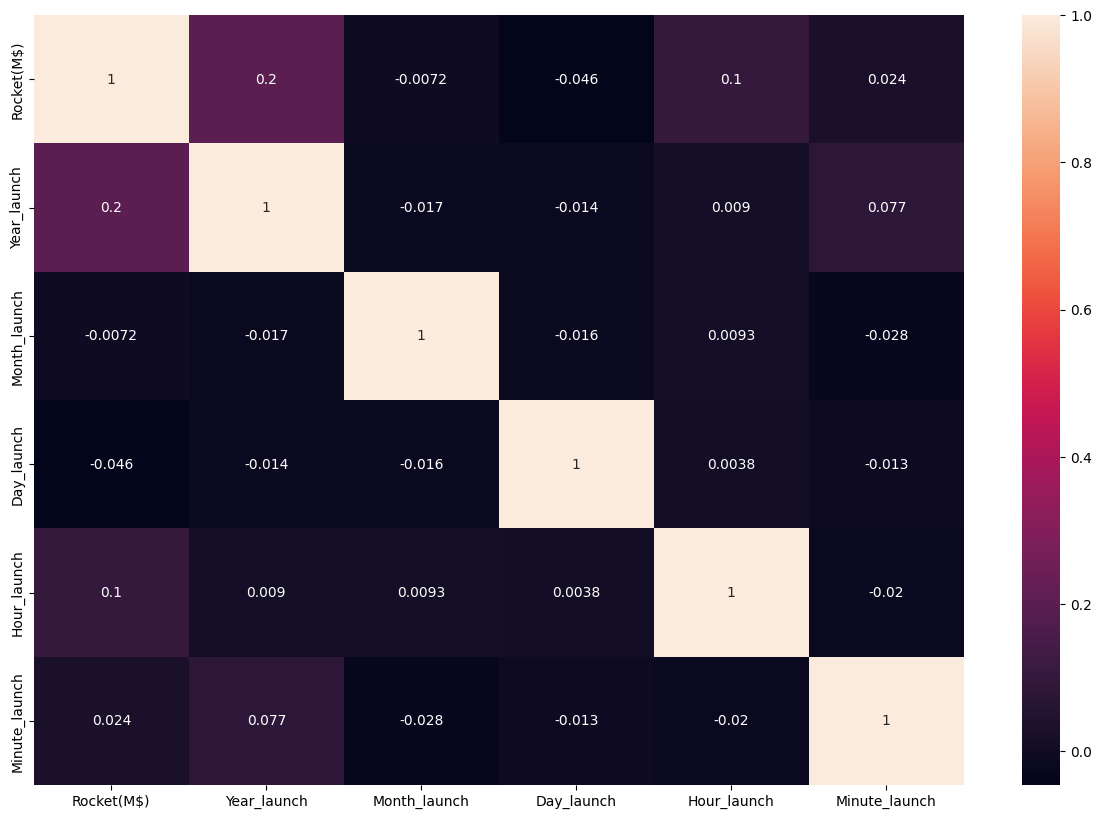

In [35]:
# Heatmap de correlações entre as colunas

plt.figure(figsize=(15, 10))
sns.heatmap(spacedf.corr(),annot = True)

## Histograma das colunas de tempo

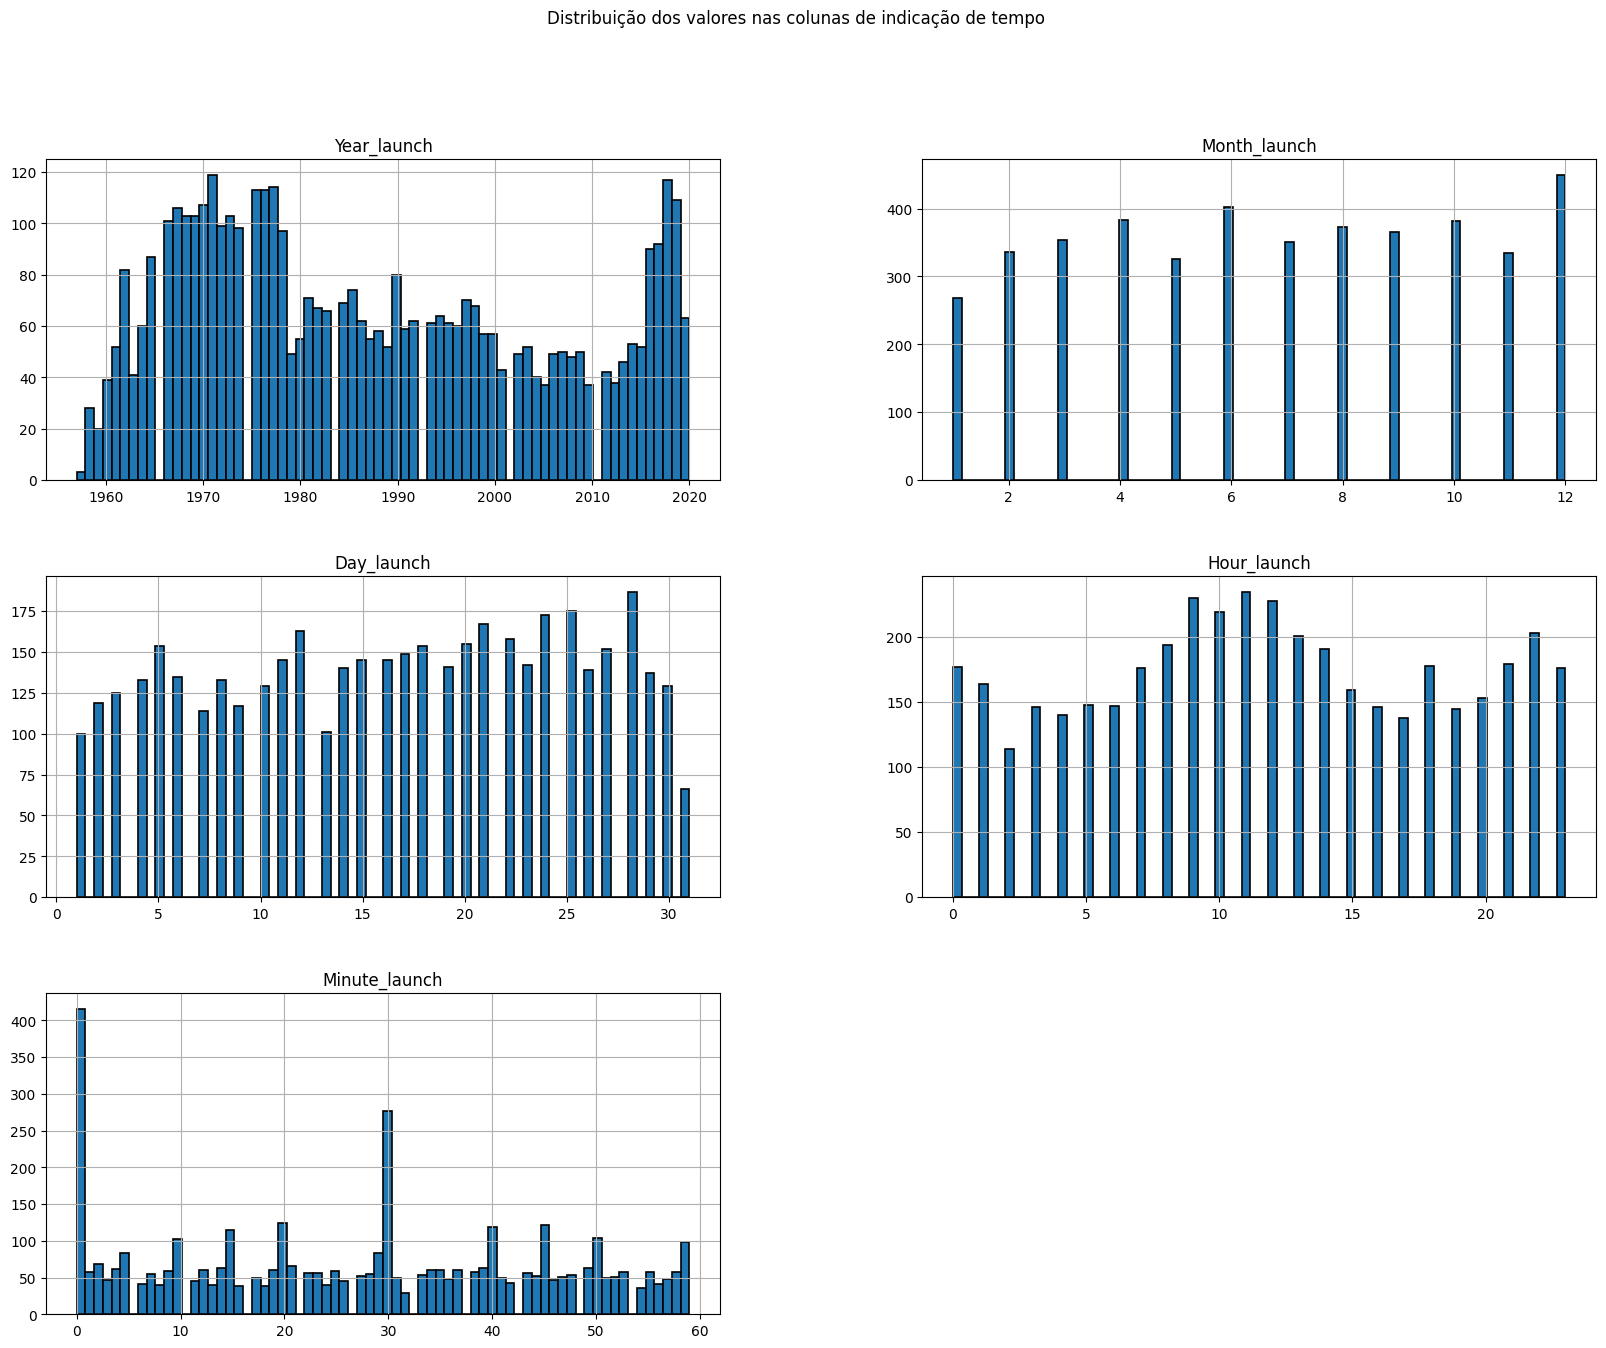

In [36]:
# Cria um histograma de cada coluna
figs = spacedf.drop(['Rocket(M$)'], axis=1).hist(figsize=(20, 15), bins=70,edgecolor='black', linewidth=1.2)

# Configura o layout
plt.xlabel('Valor')
plt.ylabel('Contagem')
plt.suptitle('Distribuição dos valores nas colunas de indicação de tempo')

plt.show()

## Gasto Total de lançamento por Companhia

In [37]:
spacedf

,Company_name,Location_launch,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch,Time_zone,Week_day_launch,Year_launch,Month_launch,Day_launch,Hour_launch,Minute_launch
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,UTC,Friday,2020,8,7,5.0,12.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,UTC,Thursday,2020,8,6,4.0,1.0
2,SpaceX,"Pad A, Boca Chica, Texas",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,UTC,Tuesday,2020,8,4,23.0,57.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,UTC,Thursday,2020,7,30,21.0,25.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,UTC,Thursday,2020,7,30,11.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,UTC,Wednesday,1958,2,5,7.0,33.0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida",Juno I | Explorer 1,StatusRetired,0.00,Success,USA,UTC,Saturday,1958,2,1,3.0,48.0
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,UTC,Friday,1957,12,6,16.0,44.0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,UTC,Sunday,1957,11,3,2.0,30.0


In [38]:
# Calcula e ajeita as colunas a serem usadas no gráfico
value = spacedfNAN.groupby(['Company_name'])['Rocket(M$)'].sum().reset_index()
value = value[value['Rocket(M$)'] > 0]
value.sort_values(['Rocket(M$)'], ascending=False, inplace=True)

# Cria o gráfico
fig = px.bar(
    value, 
    x='Company_name', 
    y='Rocket(M$)',text=(value['Rocket(M$)']*0.001).round(2).astype(str) + 'B$')


# # Adiciona o valor de gasto total em cada barra
# for i, row in value.iterrows():
#     fig.add_annotation(x=row['Company_name'], 
#                        y=row['Rocket(M$)'], 
#                        text=f'{row["Rocket(M$)"]*0.001:.1f}B$', 
#                        showarrow=True, 
#                        font=dict(size=10))

# Configura o layout do gráfico
fig.update_layout(
    xaxis=dict(title='Companhia',tickangle=45),
    yaxis=dict(title='Gasto total (M$)'),
    title='Gasto total de lançamento por companhia')

fig.show()

## Contagem de lançamento por ano

In [39]:
spacedf

,Company_name,Location_launch,Detail,Status_rocket,Rocket(M$),Status_mission,Country_launch,Time_zone,Week_day_launch,Year_launch,Month_launch,Day_launch,Hour_launch,Minute_launch
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,UTC,Friday,2020,8,7,5.0,12.0
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,UTC,Thursday,2020,8,6,4.0,1.0
2,SpaceX,"Pad A, Boca Chica, Texas",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,UTC,Tuesday,2020,8,4,23.0,57.0
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,UTC,Thursday,2020,7,30,21.0,25.0
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,UTC,Thursday,2020,7,30,11.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3BU,StatusRetired,0.00,Failure,USA,UTC,Wednesday,1958,2,5,7.0,33.0
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida",Juno I | Explorer 1,StatusRetired,0.00,Success,USA,UTC,Saturday,1958,2,1,3.0,48.0
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3,StatusRetired,0.00,Failure,USA,UTC,Friday,1957,12,6,16.0,44.0
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Success,Kazakhstan,UTC,Sunday,1957,11,3,2.0,30.0


In [40]:
# Calcula o Numero de aparições dos anos (contagem de lançamentos por ano)
year_counts = spacedf['Year_launch'].value_counts()

# Cria um df com o ano e o número de lançamentos
df = pd.DataFrame({'Ano': year_counts.index, 'Numero de lancamentos': year_counts.values})

# Calcula a porcentagem de lançamento para cada ano
total_launches = df['Numero de lancamentos'].sum()
df['Percentage'] = (df['Numero de lancamentos'] / total_launches) * 100

# Cria o gráfico de barra
fig = px.bar(df, x='Ano', y='Numero de lancamentos', title='Lançamentos por ano',
             text=df['Percentage'].round(2).astype(str) + '%')

# #Adiciona o % do total em cada barra
# for i, row in df.iterrows():
#     fig.add_annotation(x=row['Country'], 
#                        y=row['Numero de lancamentos'], 
#                        text=f'{row["Percentage"]:.2f}%', 
#                        showarrow=True, 
#                        font=dict(size=10))

# Configura o layout do gráfico
fig.update_layout(xaxis_title='Anos', yaxis_title='Numero de lançamentos')

fig.show()

## Contagem de status de lançamentos por companhia

In [58]:
# Calcula o número de aparições de cada status de missão por companhia
status_counts = spacedf.groupby('Company_name')['Status_mission'].value_counts().unstack(fill_value=0)

# Cria uma figura
fig = make_subplots(rows=2, cols=2)

# Adiciona um subplot para cada categoria do Status_mission
for i, status in enumerate(status_counts.columns):
    row = (i // 2) + 1  # Linha do subplot
    col = (i % 2) + 1   # Coluna do subplot

    # Adiciona o gráfico de colunas ao subplot
    fig.add_trace(
        go.Bar(x=status_counts.index, y=status_counts[status], name=status),
        row=row, col=col)

    # Configura o título e rótulos dos eixos
    fig.update_yaxes(title_text='Número de lançamentos', row=row, col=col)
    fig.update_xaxes(title_text='Nome da companhia', row=row, col=col)
    fig.update_layout(title=f'Status de Missão', showlegend=True)

# Configura o tamanho da figur
fig.update_layout(height=1200, width=1500, title_text='Status de Missão por companhia')

fig.show()

## Lançamentos por país

In [42]:
# Calcula o Numero de aparições dos paises (contagem de lançamentos por pais)
country_counts = spacedf['Country_launch'].value_counts()

# Cria um df com o pais e o número de lançamentos
df = pd.DataFrame({'Country': country_counts.index, 'Numero de lancamentos': country_counts.values})

# Calcula a porcentagem de lançamento para cada país
total_launches = df['Numero de lancamentos'].sum()
df['Percentage'] = (df['Numero de lancamentos'] / total_launches) * 100

# Cria o gráfico de barra
fig = px.bar(df, x='Country', y='Numero de lancamentos', title='Lançamentos por país',
             text=df['Percentage'].round(2).astype(str) + '%')

# #Adiciona o % do total em cada barra
# for i, row in df.iterrows():
#     fig.add_annotation(x=row['Country'], 
#                        y=row['Numero de lancamentos'], 
#                        text=f'{row["Percentage"]:.2f}%', 
#                        showarrow=True, 
#                        font=dict(size=10))

# Configura o layout do gráfico
fig.update_layout(xaxis_title='País', yaxis_title='Numero de lançamentos')

fig.show()

## Lançamentos que obtiveram sucesso por país

### Escala linear

In [43]:
# Agrupa os dados por 'Country_launch' e 'Status_mission'
data = spacedf.groupby(['Country_launch', 'Status_mission']).size().unstack()

# Calcula a contagem total
data['Total'] = data.sum(axis=1)

# Ordena os países com base na contagem total em ordem decrescente
data_sorted = data.sort_values(by='Total', ascending=False)
data_sorted = data_sorted.drop(columns='Total')

# Cria o gráfico de barras empilhadas
colors = ['red', 'orange', 'black','green']
fig = px.bar(data_sorted, barmode='stack', color_discrete_sequence=colors)


# Atualiza os labels dos eixos e o título do gráfico
fig.update_layout(xaxis_title='País de lançamento', yaxis_title='Contagem', title='Contagem de lançamentos por país e status ')
fig.update_xaxes(showgrid=True, gridcolor='black')
fig.update_yaxes(showgrid=True, gridcolor='black')

fig.show()

### Escala logarítmica 

In [44]:
# Agrupa os dados pelas colunas 'Country_launch' e 'Status_mission'
data = spacedf.groupby(['Country_launch', 'Status_mission']).size().unstack()

# Calcula a contagem total 
data['Total'] = data.sum(axis=1)

# Ordena os países com base na contagem total em ordem decrescente
data_sorted = data.sort_values(by='Total', ascending=False)
data_sorted = data_sorted.drop(columns='Total')

# Cria o gráfico de barras empilhadas
colors = ['red', 'orange', 'black','green']
fig = px.bar(data_sorted, barmode='stack', color_discrete_sequence=colors)

# Atualiza os eixos e o título do gráfico
fig.update_layout(xaxis_title='Pais de lançamento',
                  yaxis_title='Número de lançamento(log aplicado)',
                  title='Gráfico coluna empilhada de lançamentos por pais e status')
fig.update_xaxes(showgrid=True, gridcolor='black')
fig.update_yaxes(showgrid=True, gridcolor='black', type='log')

fig.show()

# Possivel ML

In [45]:
# Criando o df onde será aplicado o ML

dfml = spacedf.drop(['Time_zone'], axis=1)

col_target = dfml.pop('Status_mission')  # Remove a coluna e retorna ela como uma série
dfml.insert(12, 'Status_mission', col_target )

dfml

,Company_name,Location_launch,Detail,Status_rocket,Rocket(M$),Country_launch,Week_day_launch,Year_launch,Month_launch,Day_launch,Hour_launch,Minute_launch,Status_mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,USA,Friday,2020,8,7,5.0,12.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,China,Thursday,2020,8,6,4.0,1.0,Success
2,SpaceX,"Pad A, Boca Chica, Texas",Starship Prototype | 150 Meter Hop,StatusActive,0.00,USA,Tuesday,2020,8,4,23.0,57.0,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Kazakhstan,Thursday,2020,7,30,21.0,25.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida",Atlas V 541 | Perseverance,StatusActive,145.00,USA,Thursday,2020,7,30,11.0,50.0,Success
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3BU,StatusRetired,0.00,USA,Wednesday,1958,2,5,7.0,33.0,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida",Juno I | Explorer 1,StatusRetired,0.00,USA,Saturday,1958,2,1,3.0,48.0,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida",Vanguard | Vanguard TV3,StatusRetired,0.00,USA,Friday,1957,12,6,16.0,44.0,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome",Sputnik 8K71PS | Sputnik-2,StatusRetired,0.00,Kazakhstan,Sunday,1957,11,3,2.0,30.0,Success


In [46]:
# Predictors
X_df = dfml.iloc[:,0:11].values

X_df[0]

array(['SpaceX', 'LC-39A, Kennedy Space Center, Florida',
       'Falcon 9 Block 5 | Starlink V1 L9 & BlackSky', 'StatusActive',
       50.0, 'USA', 'Friday', 2020, 8, 7, 5.0], dtype=object)

In [47]:
# Target
y_df = dfml.iloc[:,12].values

y_df

array(['Success', 'Success', 'Success', ..., 'Failure', 'Success',
       'Success'], dtype=object)